In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

_ = Path().resolve().parent.parent # Add [...]\MS960_MachineLearning\Projeto2 to PYTHONPATH
sys.path.insert(0, str(_))

from Projeto2.neural_network.neural import *
from Projeto2.neural_network.plots import *
from Projeto2.run import cfg

## READING DATA

In [2]:
data_folder = "../data/test/"
res_folder  = "../data/results/keep/"

df_images   = pd.read_csv(data_folder+"images.csv", index_col=0)
df_labels   = pd.read_csv(data_folder+"labels.csv", index_col=0)

total_costs = pd.read_csv(res_folder+"costs.csv", index_col=0)
thetas_12   = pd.read_csv(res_folder+"thetas_12.csv", index_col=0)
thetas_23   = pd.read_csv(res_folder+"thetas_23.csv", index_col=0)

In [3]:
df_images

,image_1,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10,image_11,...,image_4991,image_4992,image_4993,image_4994,image_4995,image_4996,image_4997,image_4998,image_4999,image_5000
pixel_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


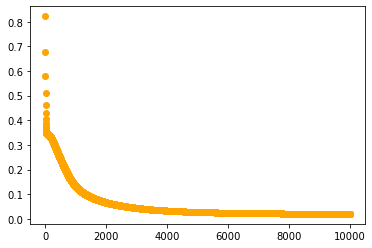

In [19]:
plt.scatter( [i for i in range(total_costs.loc['label_3'].shape[0])], total_costs.loc['label_8'] , color='orange') 

## CALCULATE VALUES FOR DATA TEST

In [4]:
class_matrix = classification_matrix(df_labels, cfg.LABELS)

activations  = activation_layer(df_images, class_matrix, thetas=[thetas_12, thetas_23])

cost         = cost_function_sigmoid(activations, class_matrix)

In [5]:
classification_labels = pd.DataFrame( activations[-1].idxmax(axis="index") , columns=['value'])

## CORRECT CLASSIFICATION

In [6]:
for i in range( classification_labels.shape[0] ):
    classification_labels.iloc[i] = int( classification_labels.iloc[i][0].split("label_")[1] )
correct_classification = 1*(classification_labels == df_labels)

correct_classification = pd.concat([correct_classification, df_labels, classification_labels], axis=1)
correct_classification.columns = ['correto', 'original', 'atribuido']

correct_classification

,correto,original,atribuido
image_1,1,10,10
image_3,1,10,10
image_4,1,10,10
image_5,1,10,10
image_6,1,10,10
...,...,...,...
image_4996,1,9,9
image_4997,1,9,9
image_4998,0,9,1
image_4999,1,9,9


In [7]:
ratio = 100 * correct_classification['correto'].value_counts(normalize=True)
print(ratio)
print(f"\nCORRECTS = {round(ratio[1],2)}%")

1    86.4
0    13.6
Name: correto, dtype: float64

CORRECTS = 86.4%


In [8]:
cost

,cost
label_1,0.040712
label_2,0.089517
label_3,0.094794
label_4,0.086762
label_5,0.122445
label_6,0.055818
label_7,0.085969
label_8,0.131709
label_9,0.094007
label_10,0.036105


## CONVERT TO CSV

In [9]:
ratio.to_csv(f"{data_folder}/test_results/ratio.csv")
cost.to_csv(f"{data_folder}/test_results/cost.csv")
correct_classification.to_csv(f"{data_folder}/test_results/corrects.csv")